<a href="https://colab.research.google.com/github/ahmadkaleem2/kaggle_Titanic/blob/main/Titanic_Kaggle_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Required Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import zipfile
import seaborn as sns


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.gaussian_process import GaussianProcessClassifier



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

Importing dataset

In [2]:
data1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic/train.csv')
test_prediction1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic/test.csv')

How many people survived?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


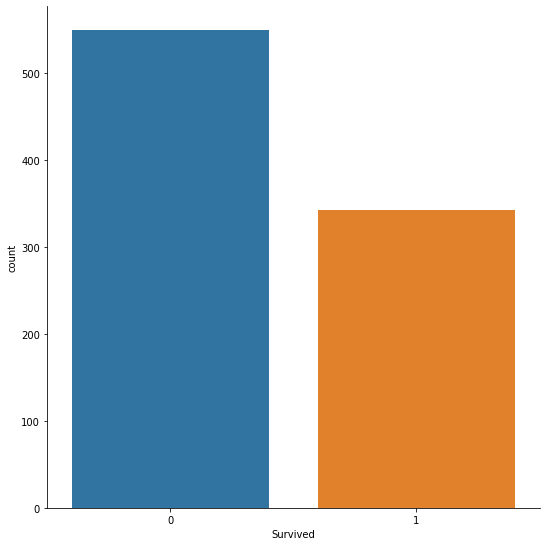

In [3]:

sns.catplot('Survived',data = data1,kind='count',height=7.5,)

Extracting Relevant features and cleaning up the dataset

In [4]:
data1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_prediction1.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
test_prediction1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data = data1.drop(['Fare','Cabin','Embarked','Name','Ticket','PassengerId'],axis=1)
y = data['Survived']
data = data.drop(['Survived'],axis=1)


test_prediction = test_prediction1.drop(['Fare','Cabin','Embarked','Name','Ticket','PassengerId'],axis=1)

In [10]:
data.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,22.0,1,0
1,1,female,38.0,1,0
2,3,female,26.0,0,0
3,1,female,35.0,1,0
4,3,male,35.0,0,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     714 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 34.9+ KB


In [12]:
[col for col in data.columns if data[col].dtypes != 'object']

['Pclass', 'Age', 'SibSp', 'Parch']

In [13]:
cat_cols = [col for col in data.columns if data[col].dtypes == 'object']
numerical_cols = [col for col in data.columns if data[col].dtypes != 'object']

In [14]:
data

,Pclass,Sex,Age,SibSp,Parch
0,3,male,22.0,1,0
1,1,female,38.0,1,0
2,3,female,26.0,0,0
3,1,female,35.0,1,0
4,3,male,35.0,0,0
...,...,...,...,...,...
886,2,male,27.0,0,0
887,1,female,19.0,0,0
888,3,female,NaN,1,2
889,1,male,26.0,0,0


In [15]:
cat_cols

['Sex']

making a pipeline for cleaning dataset

In [16]:
numerical_transformer = Pipeline(steps=[
    ('Imp',SimpleImputer(strategy='median')),
    
])

categorical_transformer = Pipeline(steps=[
                                          ('Imp1',SimpleImputer(missing_values=np.NaN,strategy='most_frequent')),
                                          ('onehot',OneHotEncoder())
])


preprocessor = ColumnTransformer(transformers=[
                                               ('num',numerical_transformer,numerical_cols),
                                               ('cat',categorical_transformer,cat_cols)
                                               ])

In [17]:
data

,Pclass,Sex,Age,SibSp,Parch
0,3,male,22.0,1,0
1,1,female,38.0,1,0
2,3,female,26.0,0,0
3,1,female,35.0,1,0
4,3,male,35.0,0,0
...,...,...,...,...,...
886,2,male,27.0,0,0
887,1,female,19.0,0,0
888,3,female,NaN,1,2
889,1,male,26.0,0,0


In [18]:
numerical_cols1 = numerical_cols.copy()

In [19]:
numerical_cols1

['Pclass', 'Age', 'SibSp', 'Parch']

In [20]:
processed_data = pd.DataFrame(preprocessor.fit_transform(data))

numerical_cols1.append('Sex_Female')
numerical_cols1.append('Sex_male')
processed_data.columns = numerical_cols1
processed_data

,Pclass,Age,SibSp,Parch,Sex_Female,Sex_male
0,3.0,22.0,1.0,0.0,0.0,1.0
1,1.0,38.0,1.0,0.0,1.0,0.0
2,3.0,26.0,0.0,0.0,1.0,0.0
3,1.0,35.0,1.0,0.0,1.0,0.0
4,3.0,35.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
886,2.0,27.0,0.0,0.0,0.0,1.0
887,1.0,19.0,0.0,0.0,1.0,0.0
888,3.0,28.0,1.0,2.0,1.0,0.0
889,1.0,26.0,0.0,0.0,0.0,1.0


Removing redundant feature

In [21]:
processed_data = processed_data.drop('Sex_Female',axis=1)

Adding column 'is_child' children have more probability of surviving

In [22]:
scaler = MinMaxScaler()
age_fare = scaler.fit_transform(processed_data[['Age']])

In [23]:
age_fare = pd.DataFrame(age_fare)

In [24]:
age_fare.columns = ['Age',]

In [25]:
processed_data['is_child']= [1 if processed_data['Age'][i]<16 else 0 for i in processed_data.index]
processed_data[0:50]

,Pclass,Age,SibSp,Parch,Sex_male,is_child
0,3.0,22.0,1.0,0.0,1.0,0
1,1.0,38.0,1.0,0.0,0.0,0
2,3.0,26.0,0.0,0.0,0.0,0
3,1.0,35.0,1.0,0.0,0.0,0
4,3.0,35.0,0.0,0.0,1.0,0
5,3.0,28.0,0.0,0.0,1.0,0
6,1.0,54.0,0.0,0.0,1.0,0
7,3.0,2.0,3.0,1.0,1.0,1
8,3.0,27.0,0.0,2.0,0.0,0
9,2.0,14.0,1.0,0.0,0.0,1


In [26]:

processed_data = processed_data.drop(['Age',],axis=1)
frames = [processed_data,age_fare]
processed_data = pd.concat(frames,axis=1)

In [27]:
processed_data

,Pclass,SibSp,Parch,Sex_male,is_child,Age
0,3.0,1.0,0.0,1.0,0,0.271174
1,1.0,1.0,0.0,0.0,0,0.472229
2,3.0,0.0,0.0,0.0,0,0.321438
3,1.0,1.0,0.0,0.0,0,0.434531
4,3.0,0.0,0.0,1.0,0,0.434531
...,...,...,...,...,...,...
886,2.0,0.0,0.0,1.0,0,0.334004
887,1.0,0.0,0.0,0.0,0,0.233476
888,3.0,1.0,2.0,0.0,0,0.346569
889,1.0,0.0,0.0,1.0,0,0.321438


In [28]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    float64
 1   SibSp     891 non-null    float64
 2   Parch     891 non-null    float64
 3   Sex_male  891 non-null    float64
 4   is_child  891 non-null    int64  
 5   Age       891 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 41.9 KB


Adding addition columns which might improve accuracy

In [29]:
processed_data['is_Alone']= [1 if processed_data['SibSp'][i]>0 or processed_data['Parch'][i]>0 else 0 for i in processed_data.index]

In [30]:
processed_data

,Pclass,SibSp,Parch,Sex_male,is_child,Age,is_Alone
0,3.0,1.0,0.0,1.0,0,0.271174,1
1,1.0,1.0,0.0,0.0,0,0.472229,1
2,3.0,0.0,0.0,0.0,0,0.321438,0
3,1.0,1.0,0.0,0.0,0,0.434531,1
4,3.0,0.0,0.0,1.0,0,0.434531,0
...,...,...,...,...,...,...,...
886,2.0,0.0,0.0,1.0,0,0.334004,0
887,1.0,0.0,0.0,0.0,0,0.233476,0
888,3.0,1.0,2.0,0.0,0,0.346569,1
889,1.0,0.0,0.0,1.0,0,0.321438,0


In [31]:
X = processed_data

In [32]:
X

,Pclass,SibSp,Parch,Sex_male,is_child,Age,is_Alone
0,3.0,1.0,0.0,1.0,0,0.271174,1
1,1.0,1.0,0.0,0.0,0,0.472229,1
2,3.0,0.0,0.0,0.0,0,0.321438,0
3,1.0,1.0,0.0,0.0,0,0.434531,1
4,3.0,0.0,0.0,1.0,0,0.434531,0
...,...,...,...,...,...,...,...
886,2.0,0.0,0.0,1.0,0,0.334004,0
887,1.0,0.0,0.0,0.0,0,0.233476,0
888,3.0,1.0,2.0,0.0,0,0.346569,1
889,1.0,0.0,0.0,1.0,0,0.321438,0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

Making models (DecisonTree,RandomForest,LogisticRegression,SGDClassifier,XGBClassifier,Naive Bayes, Linear SVM,SVC,Gaussian Classifier,KNN)

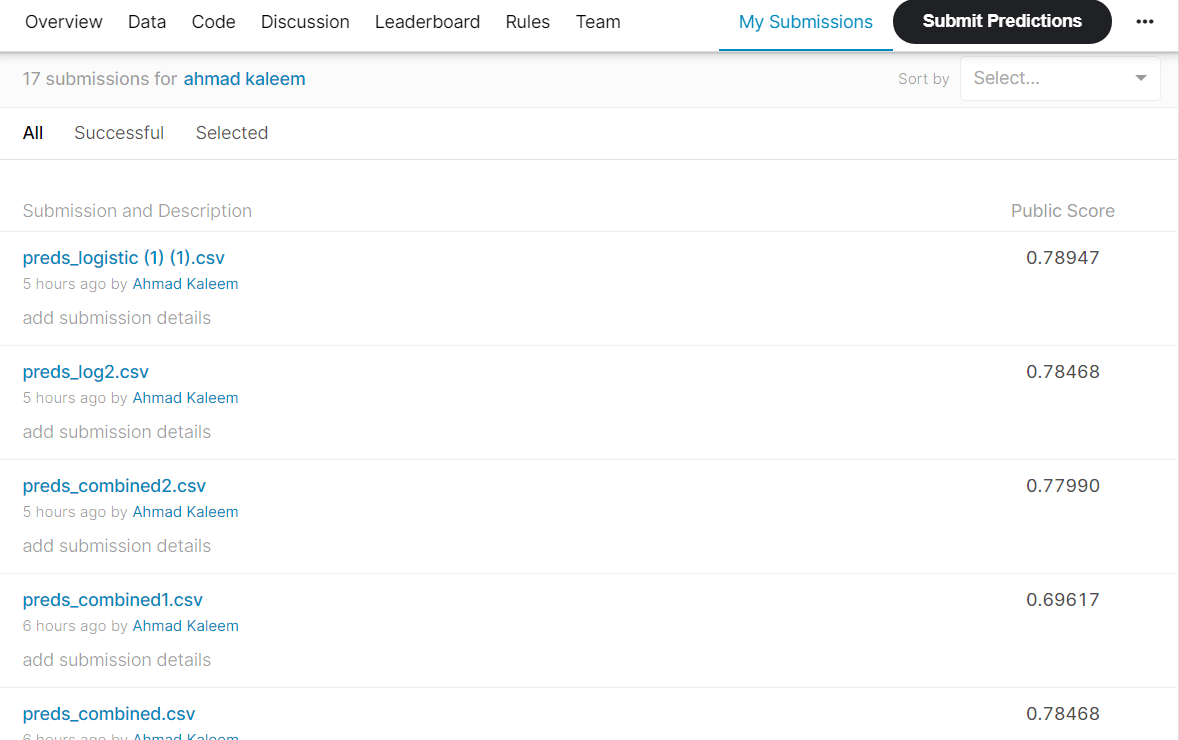

In [34]:
Decision_model = DecisionTreeClassifier(random_state=42,max_depth=10)
Decision_model.fit(X_train,y_train)
accuracy_score(y_test,Decision_model.predict(X_test))

0.7627118644067796

In [35]:
random_forest_model = RandomForestClassifier(n_estimators=50,random_state=42)
random_forest_model.fit(X_train, y_train)
accuracy_score(y_test,random_forest_model.predict(X_test))

0.8271186440677966

In [36]:
logmodel = LogisticRegression(max_iter=10,random_state=42,penalty='l2',verbose=0)

logmodel.fit(X_train,y_train)
print(accuracy_score(y_test,logmodel.predict(X_test)))

0.8338983050847457


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:
sgd_model = SGDClassifier(random_state=42,max_iter=30,)

sgd_model.fit(X_train,y_train)
print(accuracy_score(y_test,sgd_model.predict(X_test)))

0.8


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [38]:
xgb_model = XGBClassifier(random_state=42,n_estimators=80)

xgb_model.fit(X_train,y_train)
print(accuracy_score(y_test,xgb_model.predict(X_test)))

0.8406779661016949


In [39]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
print(accuracy_score(y_test,nb_model.predict(X_test)))

0.8203389830508474


In [40]:
svc_model = SVC(random_state=42,probability=True,max_iter=180)
svc_model.fit(X_train,y_train)
print(accuracy_score(y_test,svc_model.predict(X_test)))

0.8406779661016949


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=180).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [41]:
linearsvm = svm.LinearSVC(random_state=42,max_iter=300,)
linearsvm.fit(X_train,y_train)
print(accuracy_score(y_test,linearsvm.predict(X_test)))

0.823728813559322


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [42]:
gpc_model = GaussianProcessClassifier(random_state=42,max_iter_predict=5)

gpc_model.fit(X_train,y_train)
print(accuracy_score(y_test,gpc_model.predict(X_test)))

0.8338983050847457


In [43]:
knn_model = KNeighborsClassifier(n_neighbors=2,leaf_size=40)
knn_model.fit(X_train,y_train)
print(accuracy_score(y_test,knn_model.predict(X_test)))

0.8


In [44]:
models = [knn_model,gpc_model,linearsvm,svc_model,nb_model,xgb_model,sgd_model,logmodel,random_forest_model,Decision_model]

In [45]:
accuracy = np.zeros((5,len(models)))
for i in range(len(models)):
  models[i].fit(X_train,y_train)
  accuracy[:,i] = (cross_val_score(models[i],X,y,cv=5))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Accuracy of each model on 5-folds

In [46]:
all_accuracy = pd.DataFrame(accuracy,columns=['knn_model','gpc_model','linearsvm','svc_model','nb_model','xgb_model','sgd_model','logmodel','random_forest_model','Decision_model'])

In [47]:
all_accuracy

,knn_model,gpc_model,linearsvm,svc_model,nb_model,xgb_model,sgd_model,logmodel,random_forest_model,Decision_model
0,0.720670,0.793296,0.815642,0.837989,0.759777,0.804469,0.709497,0.782123,0.759777,0.804469
1,0.764045,0.797753,0.803371,0.814607,0.797753,0.814607,0.421348,0.797753,0.808989,0.803371
2,0.831461,0.820225,0.808989,0.825843,0.820225,0.831461,0.404494,0.808989,0.837079,0.808989
3,0.780899,0.808989,0.769663,0.803371,0.775281,0.797753,0.466292,0.769663,0.808989,0.769663
4,0.808989,0.853933,0.825843,0.848315,0.831461,0.848315,0.730337,0.842697,0.831461,0.820225


In [48]:
models

[KNeighborsClassifier(algorithm='auto', leaf_size=40, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                      weights='uniform'),
 GaussianProcessClassifier(copy_X_train=True, kernel=None, max_iter_predict=5,
                           multi_class='one_vs_rest', n_jobs=None,
                           n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
                           random_state=42, warm_start=False),
 LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
           intercept_scaling=1, loss='squared_hinge', max_iter=300,
           multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
           verbose=0),
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=180, probability=True, random_state=42, shrinking=True, tol=0.001,
     verbose=False),
 GaussianNB(priors=None, var_smoothin

Combining all models to check if accuracy improves

In [49]:
models = [knn_model,gpc_model,svc_model,nb_model,xgb_model,logmodel,random_forest_model,Decision_model]
def get_prob(models,X_test):
  prob = np.zeros((X_test.shape[0],len(models)))
  for i in range(len(models)):
    
    prob[:,i] = models[i].predict_proba(X_test)[:,1]
  return prob
    

In [50]:
probs = get_prob(models,X_test)

In [51]:
probs.shape

(295, 8)

In [52]:
probs

array([[0.        , 0.21427177, 0.16308582, ..., 0.09502156, 0.1       ,
        0.        ],
       [0.        , 0.16366944, 0.16359064, ..., 0.21690538, 0.04766667,
        0.        ],
       [0.        , 0.14813835, 0.17463479, ..., 0.10858949, 0.        ,
        0.15068493],
       ...,
       [0.5       , 0.65896022, 0.88482587, ..., 0.87731   , 0.71833333,
        0.5       ],
       [0.5       , 0.6275968 , 0.69646645, ..., 0.60149271, 0.34636364,
        0.62857143],
       [0.        , 0.14721163, 0.17435214, ..., 0.1084106 , 0.12141048,
        0.15068493]])

In [53]:
survived_pass = []
for x in probs:
  count=0
  for i in x:
    if i>0.5:
      count+=1
  if count>=4:
    survived_pass.append(1)
  else:
    survived_pass.append(0)

survived_pass

[0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,


In [54]:
print(accuracy_score(y_test,survived_pass))

0.8440677966101695


In [55]:
import tensorflow as tf
tf.random.set_seed(1)
model_1 = tf.keras.Sequential([
                               
                               tf.keras.layers.Dense(50),
                              tf.keras.layers.Dense(25,),
                       
                   
                     tf.keras.layers.Dense(20,'tanh'),
                     tf.keras.layers.Dense(10,'tanh'),
                     tf.keras.layers.Dense(1,'sigmoid')
])

def lr_reduce(epoch, lr):
  if epoch>100:
    lr * 0.95
  return lr
  


lr_sched = tf.keras.callbacks.LearningRateScheduler(lr_reduce)
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
model_1.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),callbacks=[lr_sched])

Epoch 1/300
19/19 [==============================] - 1s 13ms/step - loss: 0.6379 - accuracy: 0.6174 - val_loss: 0.5853 - val_accuracy: 0.6576
Epoch 2/300
19/19 [==============================] - 0s 4ms/step - loss: 0.5610 - accuracy: 0.7282 - val_loss: 0.5309 - val_accuracy: 0.7492
Epoch 3/300
19/19 [==============================] - 0s 5ms/step - loss: 0.5246 - accuracy: 0.7668 - val_loss: 0.4947 - val_accuracy: 0.8034
Epoch 4/300
19/19 [==============================] - 0s 4ms/step - loss: 0.4943 - accuracy: 0.7936 - val_loss: 0.4708 - val_accuracy: 0.8169
Epoch 5/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4803 - accuracy: 0.7970 - val_loss: 0.4562 - val_accuracy: 0.8169
Epoch 6/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4750 - accuracy: 0.7936 - val_loss: 0.4549 - val_accuracy: 0.8102
Epoch 7/300
19/19 [==============================] - 0s 3ms/step - loss: 0.4712 - accuracy: 0.7903 - val_loss: 0.4437 - val_accuracy: 0.8203
Epoch 8/300


# Predicting on test data and submitting to kaggle

In [56]:
test_prediction

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1
...,...,...,...,...,...
413,3,male,NaN,0,0
414,1,female,39.0,0,0
415,3,male,38.5,0,0
416,3,male,NaN,0,0


In [57]:
X

,Pclass,SibSp,Parch,Sex_male,is_child,Age,is_Alone
0,3.0,1.0,0.0,1.0,0,0.271174,1
1,1.0,1.0,0.0,0.0,0,0.472229,1
2,3.0,0.0,0.0,0.0,0,0.321438,0
3,1.0,1.0,0.0,0.0,0,0.434531,1
4,3.0,0.0,0.0,1.0,0,0.434531,0
...,...,...,...,...,...,...,...
886,2.0,0.0,0.0,1.0,0,0.334004,0
887,1.0,0.0,0.0,0.0,0,0.233476,0
888,3.0,1.0,2.0,0.0,0,0.346569,1
889,1.0,0.0,0.0,1.0,0,0.321438,0


In [58]:
data

,Pclass,Sex,Age,SibSp,Parch
0,3,male,22.0,1,0
1,1,female,38.0,1,0
2,3,female,26.0,0,0
3,1,female,35.0,1,0
4,3,male,35.0,0,0
...,...,...,...,...,...
886,2,male,27.0,0,0
887,1,female,19.0,0,0
888,3,female,NaN,1,2
889,1,male,26.0,0,0


In [59]:
test_prediction

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1
...,...,...,...,...,...
413,3,male,NaN,0,0
414,1,female,39.0,0,0
415,3,male,38.5,0,0
416,3,male,NaN,0,0


In [60]:
cat_cols

['Sex']

In [61]:
numerical_cols

['Pclass', 'Age', 'SibSp', 'Parch']

In [62]:

test = pd.DataFrame(preprocessor.transform(test_prediction))

In [63]:
test.columns = numerical_cols1

In [64]:
test

,Pclass,Age,SibSp,Parch,Sex_Female,Sex_male
0,3.0,34.5,0.0,0.0,0.0,1.0
1,3.0,47.0,1.0,0.0,1.0,0.0
2,2.0,62.0,0.0,0.0,0.0,1.0
3,3.0,27.0,0.0,0.0,0.0,1.0
4,3.0,22.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...
413,3.0,28.0,0.0,0.0,0.0,1.0
414,1.0,39.0,0.0,0.0,1.0,0.0
415,3.0,38.5,0.0,0.0,0.0,1.0
416,3.0,28.0,0.0,0.0,0.0,1.0


In [65]:
test = test.drop(['Sex_Female'],axis=1)

In [66]:
test

,Pclass,Age,SibSp,Parch,Sex_male
0,3.0,34.5,0.0,0.0,1.0
1,3.0,47.0,1.0,0.0,0.0
2,2.0,62.0,0.0,0.0,1.0
3,3.0,27.0,0.0,0.0,1.0
4,3.0,22.0,1.0,1.0,0.0
...,...,...,...,...,...
413,3.0,28.0,0.0,0.0,1.0
414,1.0,39.0,0.0,0.0,0.0
415,3.0,38.5,0.0,0.0,1.0
416,3.0,28.0,0.0,0.0,1.0


In [67]:
#test['is_Alone']= [1 if test['SibSp'][i]>0 or test['Parch'][i]>0 else 0 for i in test.index]

In [68]:
test['is_child']= [1 if test['Age'][i]<16 else 0 for i in test.index]

In [69]:
test

,Pclass,Age,SibSp,Parch,Sex_male,is_child
0,3.0,34.5,0.0,0.0,1.0,0
1,3.0,47.0,1.0,0.0,0.0,0
2,2.0,62.0,0.0,0.0,1.0,0
3,3.0,27.0,0.0,0.0,1.0,0
4,3.0,22.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...
413,3.0,28.0,0.0,0.0,1.0,0
414,1.0,39.0,0.0,0.0,0.0,0
415,3.0,38.5,0.0,0.0,1.0,0
416,3.0,28.0,0.0,0.0,1.0,0


In [70]:
age_fare = pd.DataFrame(scaler.transform(test[['Age']]))
age_fare.columns = ['Age']

In [71]:
test = test.drop(['Age'],axis=1)
frames = [test,age_fare]
test = pd.concat(frames,axis=1)

In [72]:
test['is_Alone']= [1 if test['SibSp'][i]>0 or test['Parch'][i]>0 else 0 for i in test.index]

In [73]:
X

,Pclass,SibSp,Parch,Sex_male,is_child,Age,is_Alone
0,3.0,1.0,0.0,1.0,0,0.271174,1
1,1.0,1.0,0.0,0.0,0,0.472229,1
2,3.0,0.0,0.0,0.0,0,0.321438,0
3,1.0,1.0,0.0,0.0,0,0.434531,1
4,3.0,0.0,0.0,1.0,0,0.434531,0
...,...,...,...,...,...,...,...
886,2.0,0.0,0.0,1.0,0,0.334004,0
887,1.0,0.0,0.0,0.0,0,0.233476,0
888,3.0,1.0,2.0,0.0,0,0.346569,1
889,1.0,0.0,0.0,1.0,0,0.321438,0


In [74]:
test

,Pclass,SibSp,Parch,Sex_male,is_child,Age,is_Alone
0,3.0,0.0,0.0,1.0,0,0.428248,0
1,3.0,1.0,0.0,0.0,0,0.585323,1
2,2.0,0.0,0.0,1.0,0,0.773813,0
3,3.0,0.0,0.0,1.0,0,0.334004,0
4,3.0,1.0,1.0,0.0,0,0.271174,1
...,...,...,...,...,...,...,...
413,3.0,0.0,0.0,1.0,0,0.346569,0
414,1.0,0.0,0.0,0.0,0,0.484795,0
415,3.0,0.0,0.0,1.0,0,0.478512,0
416,3.0,0.0,0.0,1.0,0,0.346569,0


In [75]:
logmodel.predict(test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [76]:
p_test_prediction = test_prediction1['PassengerId']

In [77]:
pred = pd.DataFrame({'PassengerId': p_test_prediction,'Survived': logmodel.predict(test)})

In [78]:
pred.to_csv('preds_log2.csv',index=False,header=1)

In [79]:
print('End')

End
